### Data Cleaning and Preprocessing

In [ ]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

#### Section 1: Data Cleaning & Preprocessing

In [2]:
# 1. Loading the dataset into Pandas DataFrame and displaying the first 5 rows
df = pd.read_csv(r"E:\LuxDev Tech DA_DS Track\Files - Assignments & Notes\Machine Learning\Car price prediction dataset.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [4]:
df.describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,5.416719
std,4.044249,8.062534e+05,5.655055e+04,4.037145,503.916303,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,14.000000


In [5]:
 #2. Checking for missing values and printing out the percentage
missing_values = df.isnull().sum()
percent_missing_values = round((missing_values/len(df)) * 100, 2)
data_dict = {"missing_values_counts": missing_values,
             "missing_values_percentage": percent_missing_values}
missing_df  = pd.DataFrame(data_dict)
missing_df

,missing_values_counts,missing_values_percentage
name,0,0.00
year,0,0.00
selling_price,0,0.00
km_driven,0,0.00
fuel,0,0.00
seller_type,0,0.00
transmission,0,0.00
owner,0,0.00
mileage(km/ltr/kg),221,2.72
engine,221,2.72


In [6]:
# 3. Dropping missing "selling price" values
df["selling_price"].isnull().sum()
### No missing values in the selling price column
### Dropping missing values would be df.dropna(subset = ["selling_price"], inplace = True)

np.int64(0)

In [7]:
# 4. Filling missing values in the “mileage” column with the mean
#Finding the mean of the mileage column
mileage_mean = df["mileage(km/ltr/kg)"].mean()
print(mileage_mean)
# Fill missing values with mean when the data has a normal distribution, use median for skewed data with outliers and mode for categorical data (string data)

19.41878335651954


In [8]:
# 4. Filling missing values in the mileage column with the mileage mean
df['mileage(km/ltr/kg)'] = df['mileage(km/ltr/kg)'].fillna (df['mileage(km/ltr/kg)'].mean())
print(df.head())

                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner  mileage(km/ltr/kg)  engine  \
0  Individual       Manual   First Owner               23.40  1248.0   
1  Individual       Manual  Second Owner               21.14  1498.0   
2  Individual       Manual   Third Owner               17.70  1497.0   
3  Individual       Manual   First Owner               23.00  1396.0   
4  Individual       Manual   First Owner               16.10  1298.0   

  max_power  seats  
0        74    5.0  
1    103.52    5.0  
2        78    5.0  
3        90    5.0  
4      88.2

In [9]:
missing_values = df.isnull().sum()
print(missing_values)
## Filling values is preferrable than dropping values where removing such values from the dataset can affect the prediction in machine learning and give misleading answers that data scientists can use to make misleading conclusions about the dataset.

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)      0
engine                221
max_power             215
seats                 221
dtype: int64


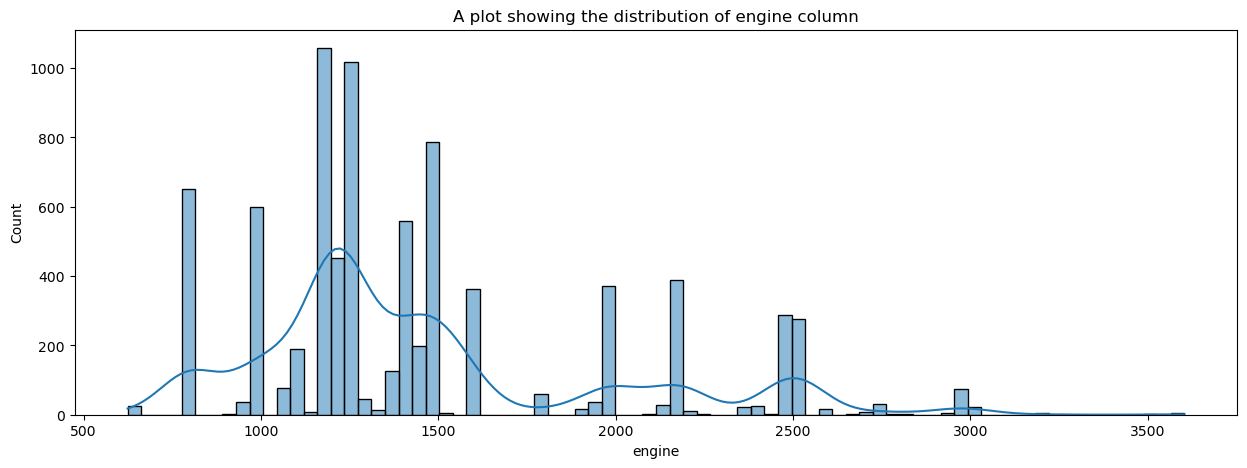

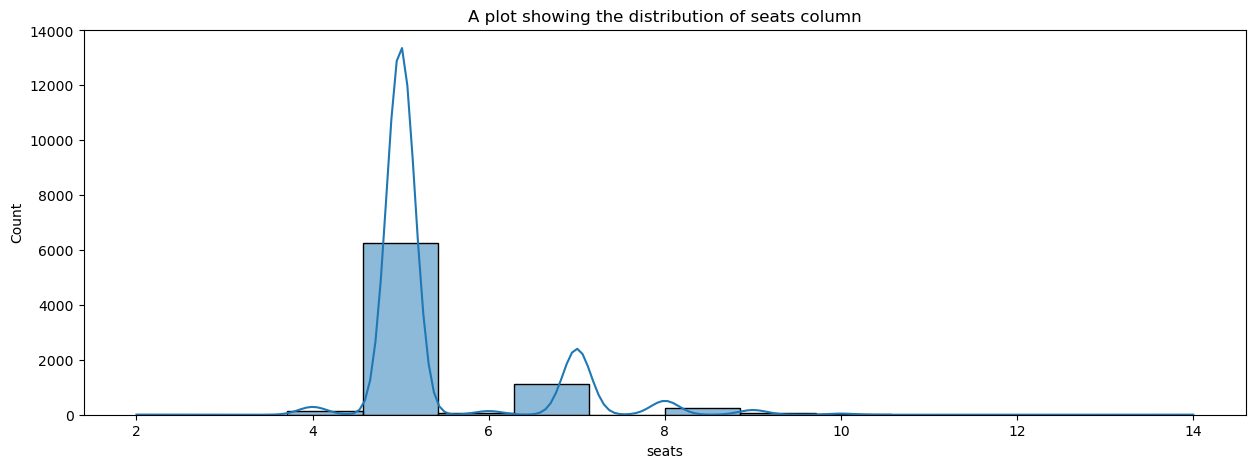

In [10]:
# Visualizing engine & seats
missing_columns = ["engine", "seats"]
for col in missing_columns:
    plt.figure(figsize= (15,5))
    sns.histplot(df, x=df[col], kde = True)
    plt.title(f"A plot showing the distribution of {col} column")
    plt.xlabel(col)

In [11]:
#Filling missing values in engine and seats with the median for the respective columns
for col in missing_columns:
    df[col] = df[col].fillna(df[col].median())
    print(f"Fill the missing values for: {col}")
    print("*"*100)
    df.isnull().sum()

Fill the missing values for: engine
****************************************************************************************************
Fill the missing values for: seats
****************************************************************************************************


In [12]:
mode =df["max_power"]. mode()
print(mode)

0    74
Name: max_power, dtype: object


In [13]:
df["max_power"].str.strip("'\"")

0           74
1       103.52
2           78
3           90
4         88.2
         ...  
8123     82.85
8124       110
8125      73.9
8126        70
8127        70
Name: max_power, Length: 8128, dtype: object

In [14]:
df["max_power"].replace(['',"nan", " ", "None"], np.nan, inplace = True)

In [15]:
df["max_power"] = pd.to_numeric(df["max_power"])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  8128 non-null   float64
 9   engine              8128 non-null   float64
 10  max_power           7912 non-null   float64
 11  seats               8128 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 762.1+ KB


In [17]:
med = df["max_power"].median()
print(med)

82.0


In [18]:
#Replacing missing values in max power
df["max_power"] = df["max_power"].fillna(df["max_power"].median())

In [19]:
df["max_power"].isnull().sum()

np.int64(0)

In [20]:
# 5. Checking & removing duplicated rows
df.duplicated().sum()

np.int64(1202)

In [21]:
df = df.drop_duplicates()

In [22]:
df.duplicated().sum()

np.int64(0)

In [23]:
# 6. Converting year column into the car's age
df["car_age"] = (2025 - df["year"])
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,11
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,19
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,15
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,18


In [24]:
# 7. Checking the unique values in the “fuel type” column
df["fuel"].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [25]:
#Replacing inconsistent values in the “transmission” column
df["transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [26]:
#Replacing inconsistent values in the “transmission” column
df["transmission"] = df["transmission"].str.capitalize()
df.head()
#str.capitalize() This method returns a string where the first character is upper case, and the rest is lower case.

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,11
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,19
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,15
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,18


In [27]:

pd.set_option("display.float_format", "{:,.2f}".format)

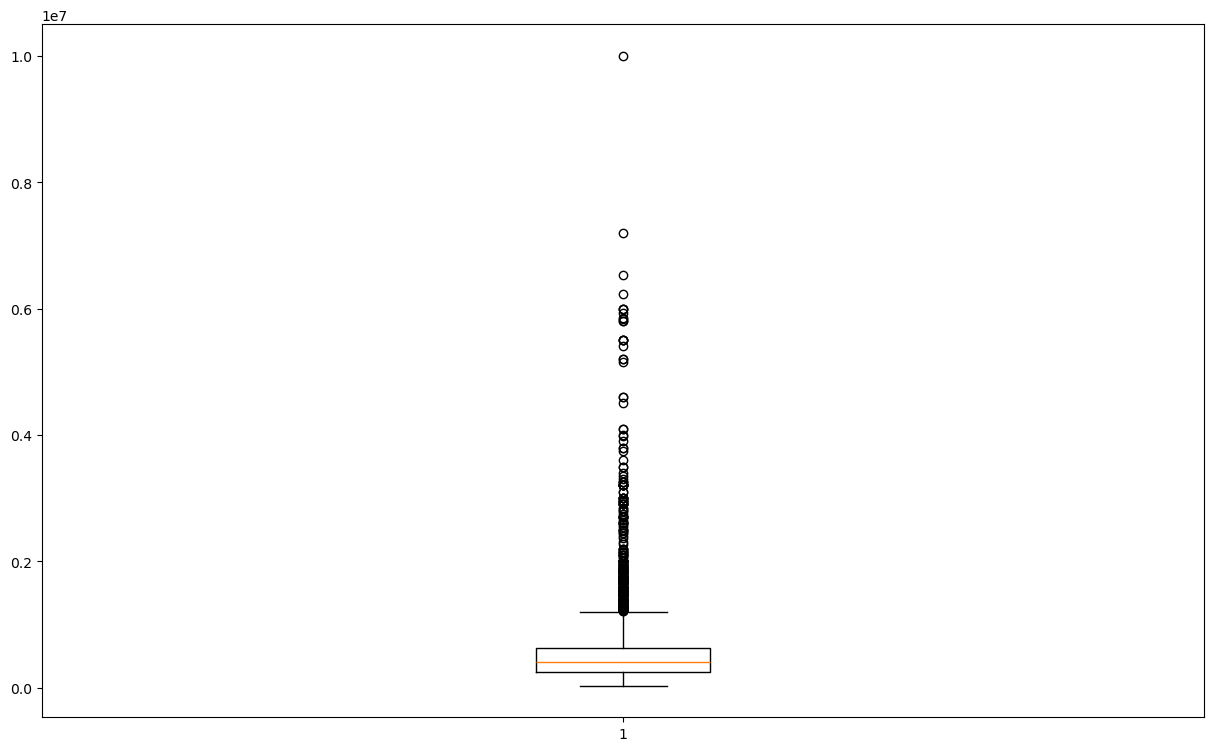

In [28]:
# 9. Checking for outliers in the “selling price” column using a boxplot
d = df["selling_price"]
fig = plt.figure(figsize=(15, 9))
plt.boxplot(d)
plt.show()  ##The boxplot shows that most of the data in the column selling price lies beyond the upper bound/fence/thresshold

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6926 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                6926 non-null   object 
 1   year                6926 non-null   int64  
 2   selling_price       6926 non-null   int64  
 3   km_driven           6926 non-null   int64  
 4   fuel                6926 non-null   object 
 5   seller_type         6926 non-null   object 
 6   transmission        6926 non-null   object 
 7   owner               6926 non-null   object 
 8   mileage(km/ltr/kg)  6926 non-null   float64
 9   engine              6926 non-null   float64
 10  max_power           6926 non-null   float64
 11  seats               6926 non-null   float64
 12  car_age             6926 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 757.5+ KB


In [30]:
# 10. Removing cars priced below 10,000 or above 5,000,000 (possible outliers)
indexselling_price = df[(df['selling_price'] > 5000000) & (df['selling_price'] < 10000)].index
df.drop(indexselling_price, inplace=True)
df.tail(100)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age
8025,Maruti 800 AC,1998,35000,40000,Petrol,Individual,Manual,Second Owner,16.10,796.00,37.00,4.00,27
8026,Tata Indigo CS LX (TDI) BS III,2008,100000,120000,Diesel,Individual,Manual,First Owner,19.09,"1,396.00",69.00,5.00,17
8027,Hyundai i10 Magna,2012,220000,67000,Petrol,Individual,Manual,Second Owner,20.36,"1,197.00",78.90,5.00,13
8028,Maruti Alto 800 VXI,2016,320000,46737,Petrol,Individual,Manual,First Owner,22.74,796.00,47.30,5.00,9
8029,Chevrolet Beat LT,2014,240000,30000,Petrol,Individual,Manual,First Owner,18.60,"1,199.00",76.80,5.00,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.00,67.10,5.00,12
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,"1,396.00",88.73,5.00,11
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,"1,197.00",82.85,5.00,12
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,"1,493.00",110.00,5.00,18


In [31]:
#11.  Standardizing the column names so they are all lowercase and contain underscores instead of spaces
df.columns = df.columns.str.lower()
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,"1,248.00",74.00,5.00,11
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,"1,498.00",103.52,5.00,11
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,"1,497.00",78.00,5.00,19
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,"1,396.00",90.00,5.00,15
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,"1,298.00",88.20,5.00,18


In [32]:
#12. Checking for numerical columns stored as strings and converting them to numbers
for column in df.columns:
    print(column,':',pd.api.types.infer_dtype(df[column])) 
#From the output below, the different numerical columns are stored as numbers, thus no further action is needed

name : string
year : integer
selling_price : integer
km_driven : integer
fuel : string
seller_type : string
transmission : string
owner : string
mileage(km/ltr/kg) : floating
engine : floating
max_power : floating
seats : floating
car_age : integer


In [33]:
#13. Creating new column for price per kilometer
df['price_per_kilometer'] = (df['selling_price'] / df['mileage(km/ltr/kg)'])
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age,price_per_kilometer
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,"1,248.00",74.00,5.00,11,"19,230.77"
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,"1,498.00",103.52,5.00,11,"17,502.37"
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,"1,497.00",78.00,5.00,19,"8,926.55"
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,"1,396.00",90.00,5.00,15,"9,782.61"
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,"1,298.00",88.20,5.00,18,"8,074.53"


In [34]:
df['price_per_kilometer'] = df['price_per_kilometer'].round(2)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age,price_per_kilometer
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,"1,248.00",74.00,5.00,11,"19,230.77"
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,"1,498.00",103.52,5.00,11,"17,502.37"
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,"1,497.00",78.00,5.00,19,"8,926.55"
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,"1,396.00",90.00,5.00,15,"9,782.61"
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,"1,298.00",88.20,5.00,18,"8,074.53"


In [35]:
#14. Resetting the index after data cleaning
df.reset_index(drop=True)
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age,price_per_kilometer
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,"1,248.00",74.00,5.00,11,"19,230.77"
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,"1,498.00",103.52,5.00,11,"17,502.37"
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,"1,497.00",78.00,5.00,19,"8,926.55"
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,"1,396.00",90.00,5.00,15,"9,782.61"
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,"1,298.00",88.20,5.00,18,"8,074.53"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.00,67.10,5.00,12,"13,756.61"
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,"1,396.00",88.73,5.00,11,"21,073.65"
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,"1,197.00",82.85,5.00,12,"17,297.30"
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,"1,493.00",110.00,5.00,18,"8,035.71"


In [36]:
#15.  Saving the dataframe to csv
df.to_csv(r'E:\LuxDev Tech DA_DS Track\Files - Assignments & Notes\Machine Learning\cleaned_cars.csv.')

### Section 2: Exploratory Data Analysis (EDA)


In [37]:
#16. The average selling price of cars in the dataset
average_selling_price = df['selling_price'].mean().round(2)
print(average_selling_price)

517270.68


In [38]:
# 17.The most common fuel type in the dataset
df.value_counts(df['fuel'])

fuel
Diesel    3755
Petrol    3077
CNG         56
LPG         38
Name: count, dtype: int64

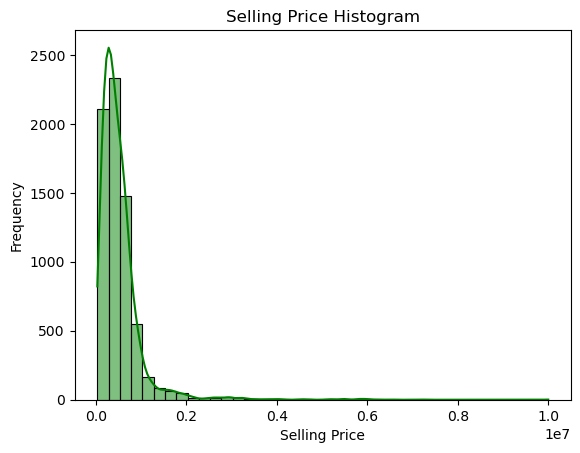

In [39]:
#18.A histogram of the selling prices
sns.histplot(df['selling_price'], bins=40, kde=True, color = 'green')
plt.title("Selling Price Histogram")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.show()

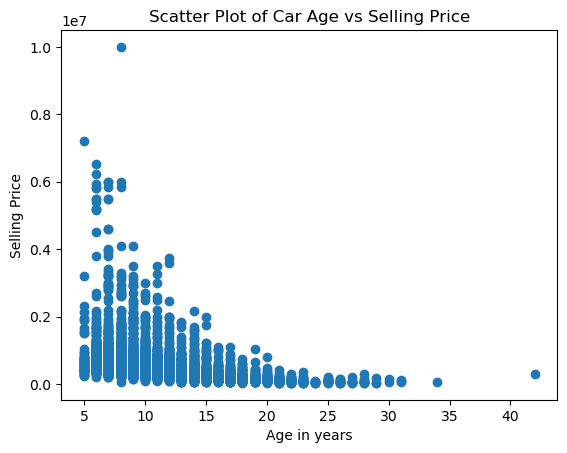

In [40]:
#19.  Scatter plot showing the relationship between car age and selling price
#x = car age; y = selling price
x= df['car_age']
y= df['selling_price']

plt.scatter(x, y)
plt.xlabel('Age in years')
plt.ylabel('Selling Price')
plt.title('Scatter Plot of Car Age vs Selling Price', fontsize=12)
plt.show()
#Inversely relationship between selling price and age, where newer cars cost more while older cars are cheaper

In [41]:
#20. The average selling price of cars by fuel type
average_selling_price_by_fuel_type = df.groupby("fuel")["selling_price"].mean()
print("Average selling price of cars by fuel type")
print(average_selling_price_by_fuel_type) # Diesel cars cost more while vehicels using LPG are the cheapest

Average selling price of cars by fuel type
fuel
CNG      300,499.95
Diesel   639,727.77
LPG      200,421.05
Petrol   375,688.97
Name: selling_price, dtype: float64


In [42]:
print(df["transmission"].unique())

['Manual' 'Automatic']


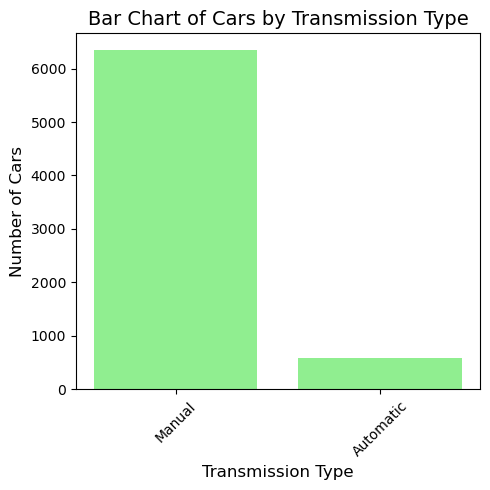

In [43]:
#21. Bar chart showing the number of cars per transmission type

# Frequency of each transmission type
transmission_counts = df['transmission'].value_counts()

# Create the bar chart
plt.figure(figsize=(5, 5))
plt.bar(transmission_counts.index, transmission_counts.values, color='lightgreen')  # Plot bars
plt.title("Bar Chart of Cars by Transmission Type", fontsize=14)
plt.xlabel("Transmission Type", fontsize=12)
plt.ylabel("Number of Cars", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [44]:
# 22. Car with the highest mileage
max_mileage = df['mileage(km/ltr/kg)'].idxmax()
car_name= df.loc[max_mileage, 'name']
print("Car with the highest mileage:", car_name)
print("Mileage:", df.loc[max_mileage, 'mileage(km/ltr/kg)'])

Car with the highest mileage: Volvo XC90 T8 Excellence BSIV
Mileage: 42.0


In [45]:
df['mileage(km/ltr/kg)'].max()

42.0

In [46]:
#23. #Correlation between mileage and selling price
correlation = df['mileage(km/ltr/kg)'].corr(df['selling_price'])
print(correlation)

-0.10728200874810073


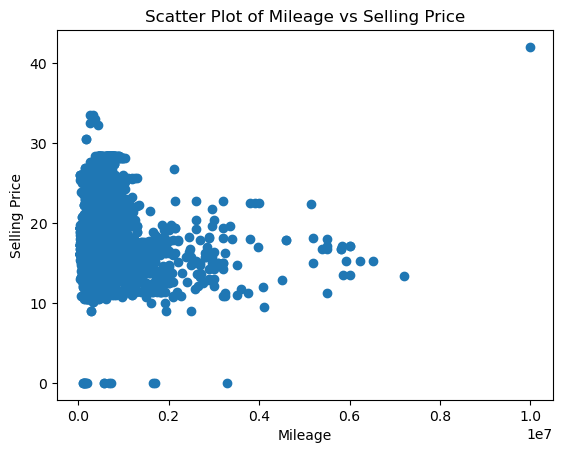

In [47]:
# A weak negative correlation between mileage and selling price.
# To confirm the relationship using the scatter plot below
y= df['mileage(km/ltr/kg)']
x= df['selling_price']

plt.scatter(x, y)
plt.xlabel('Mileage')
plt.ylabel('Selling Price')
plt.title('Scatter Plot of Mileage vs Selling Price', fontsize=12)
plt.show()

In [48]:
#24. Heatmap showing the correlations between all numerical columns
numerical_columns_df = df[['year', 'selling_price', 'km_driven', 'mileage(km/ltr/kg)', 'engine', 'max_power', 'seats', 'car_age']]
numerical_columns_df.head(5)

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,max_power,seats,car_age
0,2014,450000,145500,23.40,"1,248.00",74.00,5.00,11
1,2014,370000,120000,21.14,"1,498.00",103.52,5.00,11
2,2006,158000,140000,17.70,"1,497.00",78.00,5.00,19
3,2010,225000,127000,23.00,"1,396.00",90.00,5.00,15
4,2007,130000,120000,16.10,"1,298.00",88.20,5.00,18


<Axes: >

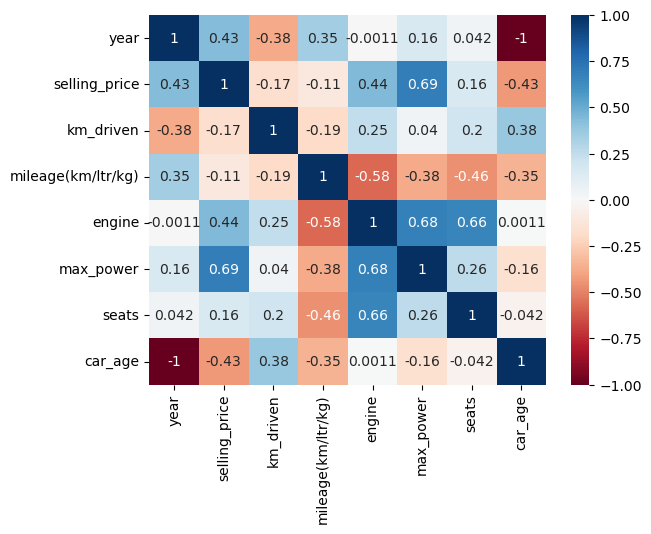

In [49]:
correlation_numerical_columns= numerical_columns_df.corr()
sns.heatmap(correlation_numerical_columns, cmap= 'RdBu', annot=True)

In [50]:
#25. The cost of manual cars vs automatic cars
average_price_by_transmission= df.groupby("transmission")["selling_price"].mean()
print("The average price of a car by transmission type is:")
print(average_price_by_transmission)

The average price of a car by transmission type is:
transmission
Automatic   1,309,712.30
Manual        444,299.07
Name: selling_price, dtype: float64


In [51]:
#26. The average selling price for each year of manufacture
selling_price_average_year= df.groupby("year")["selling_price"].mean().round(2)
print(selling_price_average_year)

year
1983   300,000.00
1991    55,000.00
1994    88,000.00
1995   107,500.00
1996    81,666.67
1997    90,181.73
1998    73,100.00
1999    71,470.59
2000    90,047.85
2001    47,220.33
2002    99,153.81
2003    97,034.02
2004   109,364.25
2005   137,994.49
2006   164,383.31
2007   174,894.51
2008   208,397.64
2009   227,691.62
2010   273,897.33
2011   318,335.70
2012   351,387.38
2013   451,501.72
2014   511,858.80
2015   589,177.63
2016   653,180.34
2017   732,419.52
2018   866,376.61
2019   949,668.55
2020   888,349.16
Name: selling_price, dtype: float64


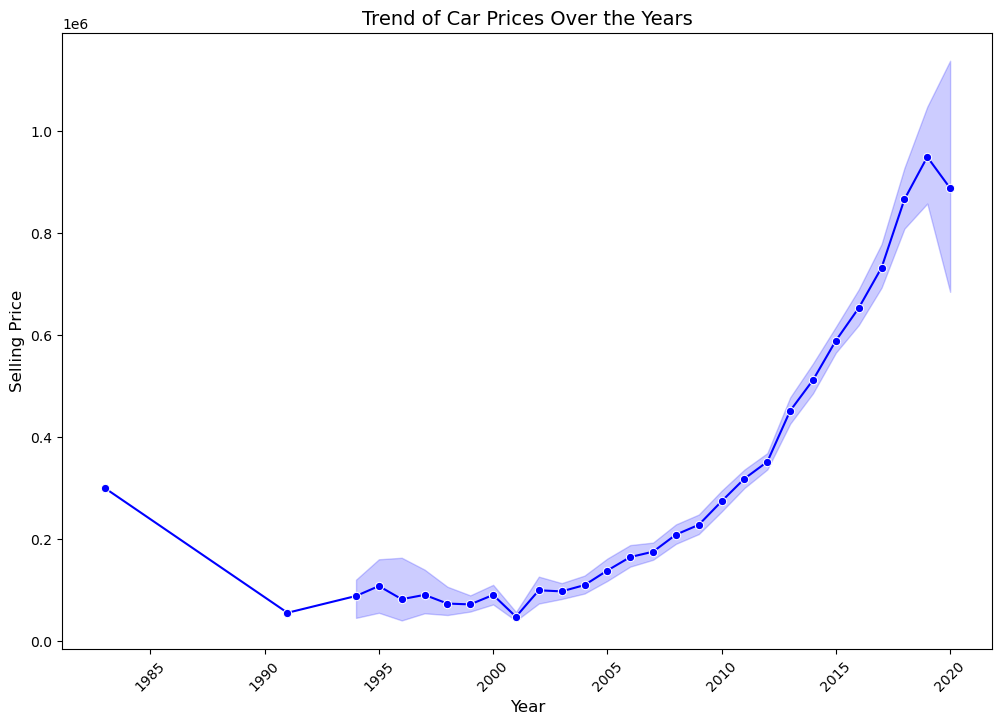

In [52]:
#27. Line chart showing the trend of selling prices over the years
x = df["year"]
y = df["selling_price"]

# Create line chart
plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='selling_price', data=df, marker='o', color='blue')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Selling Price", fontsize=12)
plt.title("Trend of Car Prices Over the Years", fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [53]:
#28. The most expensive car for each fuel type
idx=df.groupby('transmission')['selling_price'].idxmax()
idx=idx.dropna()
most_expensive_cars= df.loc[idx, ['selling_price', 'name', 'transmission']]

print(most_expensive_cars)




      selling_price                             name transmission
170        10000000    Volvo XC90 T8 Excellence BSIV    Automatic
1821        3200000  Toyota Fortuner 2.8 4WD MT BSIV       Manual


In [54]:
#29. Which brand appears most frequently in the dataset
df["name"].value_counts()

name
Maruti Swift Dzire VDI                          118
Maruti Alto 800 LXI                              76
Maruti Alto LXi                                  69
Maruti Swift VDI                                 60
Maruti Swift VDI BSIV                            56
                                               ... 
Ford EcoSport 1.5 TDCi Titanium Plus BE BSIV      1
Ford Figo 1.5 Sports Edition MT                   1
Volkswagen Polo Select 1.2 MPI Highline           1
Honda Jazz V Diesel                               1
Renault Duster RXZ 110PS AMT BSIV                 1
Name: count, Length: 2058, dtype: int64

In [55]:
#30. Top 5 most common combinations of fuel type and transmission
combinations = df.groupby(["fuel", "transmission"])
print(combinations.first())


                                                   name  year  selling_price  \
fuel   transmission                                                            
CNG    Manual          Maruti Alto 800 CNG LXI Optional  2019         330000   
Diesel Automatic             Mercedes-Benz B Class B180  2014        1450000   
       Manual                    Maruti Swift Dzire VDI  2014         450000   
LPG    Manual              Maruti Wagon R LXI DUO BSIII  2007          96000   
Petrol Automatic     Jeep Compass 1.4 Limited Plus BSIV  2019        2100000   
       Manual                  Honda City 2017-2020 EXi  2006         158000   

                     km_driven seller_type         owner  mileage(km/ltr/kg)  \
fuel   transmission                                                            
CNG    Manual            10000  Individual  Second Owner               33.44   
Diesel Automatic         27800      Dealer  Second Owner               14.80   
       Manual           145500  Individ

#### Section 3: Machine Learning


In [56]:
#31. Main assumptions of Linear Regression; validation using this dataset
# 1. Linearity - A linerar relationship between the relevant variables being analyzed, proportional change between the independent & dependent variables
# 2. Homoscedasticity of residuals in linear regression (The spread of the errors should be relatively uniform regardless of the predictor value)
# 3. Normal distribution of data and residuals for hypothesis tests, confidence intervals and p-values to be valid
# 4. Independence of errors
# 5. Lack of multicollinearity (The independent variables are not highly correlated with each other)

In [57]:
#32. Training Linear Regression model to predict the car's selling price

X=df[['year', 'selling_price', 'km_driven', 'mileage(km/ltr/kg)', 'engine', 'max_power', 'seats', 'car_age']] #Feature
y=df["selling_price"]   #Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(y_pred)

[ 611000. 1050000.  245000. ...  430000.  600000.  810000.]


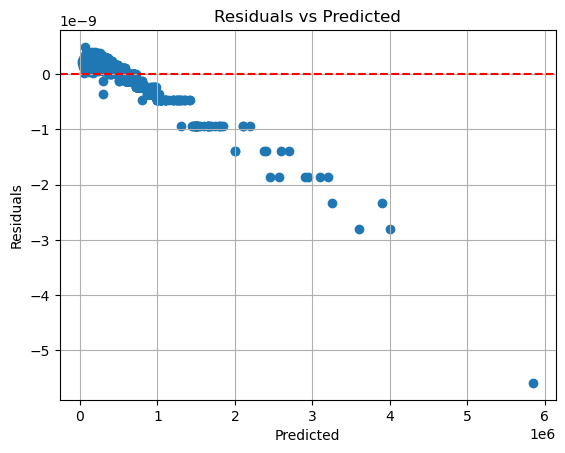

In [70]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

In [59]:
# Regression coefficients
print('Coefficients: ', model.coef_)

# Variance score: 1 means perfect prediction
print('Variance score: {}'.format(model.score(X_test, y_test)))

Coefficients:  [-8.90117652e-12  1.00000000e+00  5.55111512e-17  2.65245194e-13
  1.59769938e-15  5.67710246e-14 -3.13340261e-12  8.90117655e-12]
Variance score: 1.0


In [72]:
print(y_test.shape, y_pred.shape)

(1386,) (1386,)


In [66]:
#33. Linear Regression model's evaluation using R-Squared score and MSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("R Squared (R2):", r2)
print("Mean Absolute Error(MAE)", mae)
print("Root Mean Squared Error (RMSE)", rmse)

Mean Squared Error (MSE): 1.3200269964648604e-19
R Squared (R2): 1.0
Mean Absolute Error(MAE) 2.3064943125221509e-10
Root Mean Squared Error (RMSE) 3.633217577389029e-10


In [76]:
#34. Lasso Regression on the dataset and comparing its performance with Linear Regression.
# Lasso Model
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

# Evaluation
print("Lasso MAE:", mean_absolute_error(y_test, lasso_pred))
print("Lasso MSE:", mean_squared_error(y_test, lasso_pred))
print("Lasso R Square (R2):", r2_score(y_test, lasso_pred))

Lasso MAE: 23.949497913460625
Lasso MSE: 1221.3101257760418
Lasso R Square (R2): 0.9999999964774595


In [77]:
#35. Using Ridge Regression on the dataset vs Linear regression & Lasso regression
#Ridge Model
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Ridge Model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

#Evaluation
print("Ridge MAE:", mean_absolute_error(y_test, ridge_pred))
print("Ridge MSE:", mean_squared_error(y_test, ridge_pred))
print("Ridge R Square (R2):", r2_score(y_test, ridge_pred))

Ridge MAE: 9.445725868941214e-10
Ridge MSE: 3.1014717915087168e-18
Ridge R Square (R2): 1.0


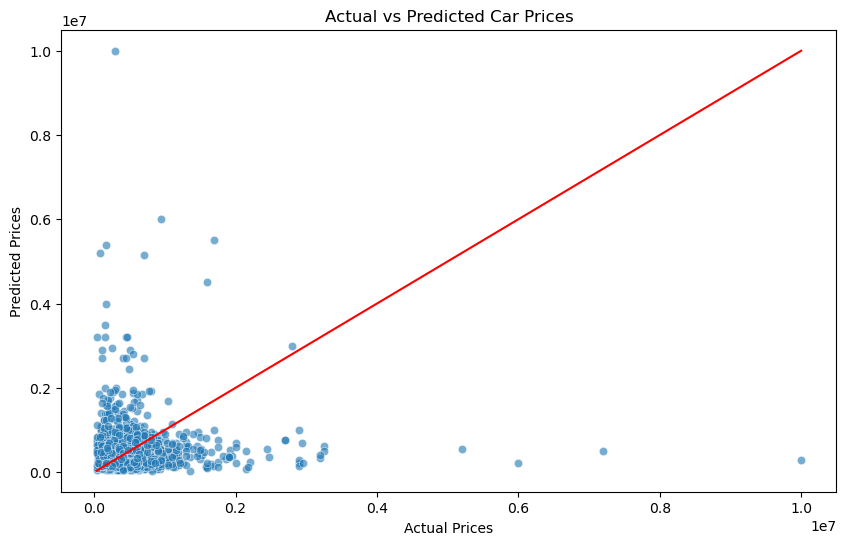

In [81]:
#37. Predicted vs actual prices using Lasso model

#Visualizing the regression results(predicted vs actual)

plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=lasso_pred, alpha=0.6)
sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], color='red')
plt.title('Actual vs Predicted Car Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

In [83]:
#39. Trying Polynomial Regression on the dataset
X=df[['year', 'selling_price', 'km_driven', 'mileage(km/ltr/kg)', 'engine', 'max_power', 'seats', 'car_age']] #Feature
y=df["selling_price"]  #Target

lin = LinearRegression()

lin.fit(X, y)


LinearRegression()

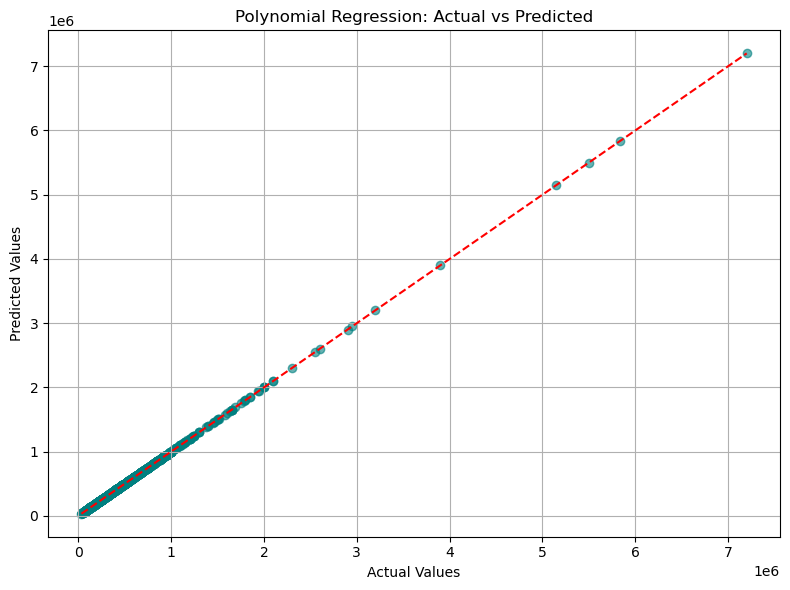

In [87]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform features to polynomial
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Fit the model
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Predict
y_pred = model.predict(X_poly_test)

# Visualize predictions vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Polynomial Regression: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()